In [640]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

In [641]:
freq_data = "DATA/NH_2022_table8_frequency.csv"
mort_data = "DATA/NH_2022_table9_mortality.csv"
gdp_data = "DATA/GDP-per-capita.csv"
igap_data = "DATA/Ins_Protection_Gaps.csv"

In [642]:
freq_df = pd.read_csv(freq_data, sep=";")
mort_df = pd.read_csv(mort_data, sep=";")
gdp_df = pd.read_csv(gdp_data, sep=",")
gdp_df = gdp_df[['Country Name','Country Code','2023']]
igap_df = pd.read_csv(igap_data, sep=";")

In [643]:
freq_df.sample(3)

,0,Full country name,Abbreviation,LevelI,LevelII,LevelIII,Total number
22,23,The Democratic Socialist Republic of Sri Lanka,LKA,37,21,0,58
3,4,The Republic of Indonesia,IDN,125,70,11,206
16,17,Japan,JPN,31,28,10,69


In [644]:
mort_df.sample(3)

,0,Full country name,Abbreviation,LevelI,LevelII,LevelIII,Total number
22,23,The United Mexican States,MEX,277,1054,1310,2641.0
10,11,The Socialist Republic of Viet Nam,VNM,946,3832,1087,5865.0
4,5,The People's Republic of China,CHN,4592,7952,22190,34734.0


In [645]:
gdp_df.sample(3)

,Country Name,Country Code,2023
237,Timor-Leste,TLS,1648.647290
239,Tonga,TON,NaN
80,Gabon,GAB,8420.102057


In [646]:
igap_df.sample(3)

,Country,Country code,Losses,Insured losses,Protection Gap bnUSD,Protection Gap Percent
2,Switzerland,CHE,5,4,1,0.28
0,USA,USA,1142,662,479,0.42
10,China,CHN,290,17,273,0.94


Merge the NH-2022 data on flood frequency and mortality

In [647]:
floodrisk_df = freq_df.set_index('Abbreviation').join(mort_df[['Abbreviation', 'Total number']].rename(columns={'Total number' : 'Mortalities'}).set_index('Abbreviation')).reset_index().drop(columns=['0','LevelI','LevelII','LevelIII']).rename(columns={'Total number' : 'Floods'})
floodrisk_df.sample(3)

,Abbreviation,Full country name,Floods,Mortalities
29,ESP,The Kingdom of Spain,41,NaN
3,IDN,The Republic of Indonesia,206,5160.0
26,TUR,The Republic of Turkey,46,NaN


Join on the GDP per capita (Abbreviations in flood risk data are consistent with country codes in GDP data)

Join on the insurance protection gap data (Abbreviations in flood risk data are consistent with country codes in Ins. Gap data)

In [648]:
master_df = floodrisk_df.set_index('Abbreviation').join(gdp_df[['Country Code','2023']].set_index('Country Code')).rename(columns={'2023':'GDP per capita'})
master_df = master_df.join(igap_df[['Country code','Protection Gap bnUSD','Protection Gap Percent']].set_index('Country code'))
master_df.head(31)

,Full country name,Floods,Mortalities,GDP per capita,Protection Gap bnUSD,Protection Gap Percent
Abbreviation,,,,,,
USA,The United States of America,467,4858.0,81695.187071,479.0,0.42
CHN,The People's Republic of China,396,34734.0,12614.060995,273.0,0.94
IND,The Republic of India,262,53634.0,2484.845429,81.0,0.91
IDN,The Republic of Indonesia,206,5160.0,4940.549805,NaN,NaN
PHL,The Republic of the Philippines,188,18864.0,3725.551205,NaN,NaN
AUS,Australia,139,NaN,64711.765603,12.0,0.33
VNM,The Socialist Republic of Viet Nam,117,5865.0,4346.768492,NaN,NaN
RUS,The Russian Federation,115,NaN,13817.045898,NaN,NaN
BRA,The Federative Republic of Brazil,109,3796.0,10043.623922,NaN,NaN


Top 5 in terms of flood frequency

In [649]:
master_df.sort_values('Floods',ascending=False).head()

,Full country name,Floods,Mortalities,GDP per capita,Protection Gap bnUSD,Protection Gap Percent
Abbreviation,,,,,,
USA,The United States of America,467,4858.0,81695.187071,479.0,0.42
CHN,The People's Republic of China,396,34734.0,12614.060995,273.0,0.94
IND,The Republic of India,262,53634.0,2484.845429,81.0,0.91
IDN,The Republic of Indonesia,206,5160.0,4940.549805,NaN,NaN
PHL,The Republic of the Philippines,188,18864.0,3725.551205,NaN,NaN


Top 5 in terms of GDP per capita

In [650]:
master_df.sort_values('GDP per capita',ascending=False).head()

,Full country name,Floods,Mortalities,GDP per capita,Protection Gap bnUSD,Protection Gap Percent
Abbreviation,,,,,,
USA,The United States of America,467,4858.0,81695.187071,479.0,0.42
AUS,Australia,139,NaN,64711.765603,12.0,0.33
CAN,Canada,58,NaN,53371.697432,13.0,0.41
GBR,The United Kingdom of Great Britain and Northe...,70,NaN,48866.603960,2.0,0.21
FRA,The French Republic,45,NaN,44460.817846,19.0,0.46


Top 5 in terms of Protection Gap

In [651]:
master_df.sort_values('Protection Gap bnUSD',ascending=False).head()

,Full country name,Floods,Mortalities,GDP per capita,Protection Gap bnUSD,Protection Gap Percent
Abbreviation,,,,,,
USA,The United States of America,467,4858.0,81695.187071,479.0,0.42
CHN,The People's Republic of China,396,34734.0,12614.060995,273.0,0.94
JPN,Japan,69,NaN,33834.392106,89.0,0.55
IND,The Republic of India,262,53634.0,2484.845429,81.0,0.91
MEX,The United Mexican States,91,2641.0,13926.113619,27.0,0.75


In [652]:
master_df.head()

,Full country name,Floods,Mortalities,GDP per capita,Protection Gap bnUSD,Protection Gap Percent
Abbreviation,,,,,,
USA,The United States of America,467,4858.0,81695.187071,479.0,0.42
CHN,The People's Republic of China,396,34734.0,12614.060995,273.0,0.94
IND,The Republic of India,262,53634.0,2484.845429,81.0,0.91
IDN,The Republic of Indonesia,206,5160.0,4940.549805,NaN,NaN
PHL,The Republic of the Philippines,188,18864.0,3725.551205,NaN,NaN


Visualise the key indicators: 'Floods','GDP per capita','Protection Gap bnUSD'

<AxesSubplot:xlabel='Abbreviation'>

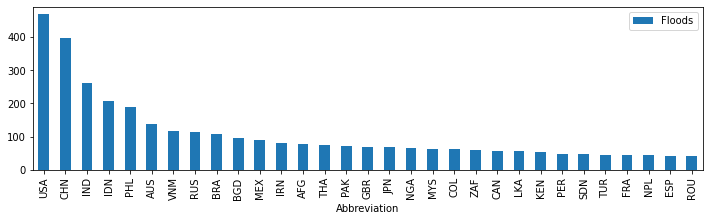

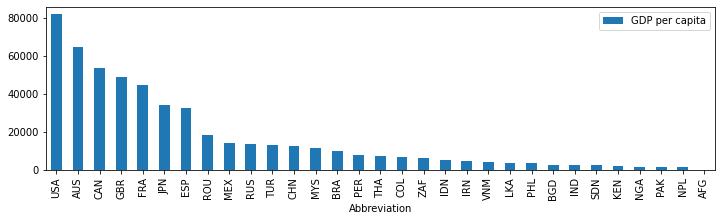

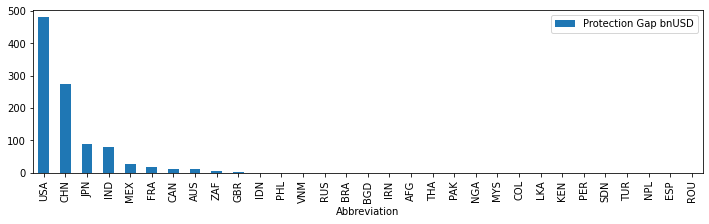

In [658]:
df_key_ind = master_df[['Floods','GDP per capita','Protection Gap bnUSD']]
df_key_ind[['Floods']].sort_values('Floods',ascending=False).plot.bar(rot=90,figsize=(12,3))
df_key_ind[['GDP per capita']].sort_values('GDP per capita',ascending=False).plot.bar(rot=90,figsize=(12,3))
df_key_ind[['Protection Gap bnUSD']].sort_values('Protection Gap bnUSD',ascending=False).plot.bar(rot=90,figsize=(12,3))

Scale the key humanitarian indicators with respect to the minimum and maximum in the dataset, for visualisation of relative expected humanitarian impact

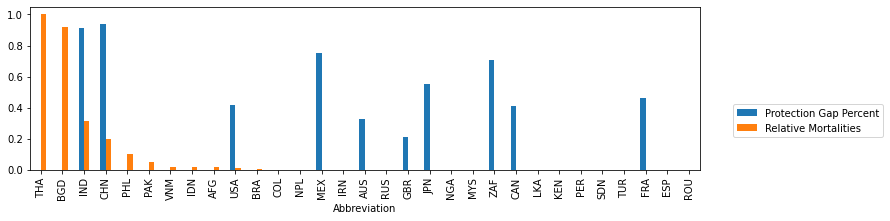

In [656]:
df_rel_hum = master_df[['Mortalities','Protection Gap Percent']]

#scikitlearn's MinMax scaler loses index values, do the rescaling explicitly
maxval = max(df_rel_hum['Mortalities'])
minval = min(df_rel_hum['Mortalities'])
df_rel_hum['Relative Mortalities'] = df_rel_hum['Mortalities'].apply(lambda x : (x-minval)/(maxval-minval))

ax = df_rel_hum.drop(columns=['Mortalities']).sort_values('Relative Mortalities',ascending=False).plot.bar(rot=90,figsize=(12,3))
ax.legend(loc=(1.05, 0.2))

# India!

NOTE: 

* USA has Nasa / MODIS
* China has satellites AND political reasons to avoid ESA